In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [30]:
from google.colab import files
uploaded = files.upload()

Saving extract_reviews.csv to extract_reviews (1).csv


In [43]:
reviews = pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I started using th...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My son just loved ...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n it's very helpful ...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good option to buy...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Useful for my baby...
5,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This book is wonde...
6,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Expected bigger si...
7,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My baby like it.\n...
8,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Its looks are gran...
9,4.0 out of 5 stars,NaN


In [42]:
comments = [str(comment).strip() for comment in reviews.comment if isinstance(comment, str) and comment.strip()]
comments

['I started using this for my baby when she was 7 months old. And I find it very useful for her eye concentration, speach development, knowledge, fun time, etc.',
 'My son just loved the library concept, loved to have his own set on his table. Good quality of print and pictures fascinated him to learn and its very easy to handle',
 "it's very helpful for the kids age 1.5 years and above. To recognize diffrent things. Particularly the book shapes out of 10 diffrent book for initial stage not useful.  Ang suggest for some of the pictorial represntation need to change atleast for begginer.",
 'Good option to buy for the kids',
 'Useful for my baby 👶',
 'This book is wonderful for babies above 10 months to 3 years. A complete collection of knowledge to our kids. Very neat. Real time pictures. Overall I loved these books.',
 'Expected bigger size books',
 'My baby like it.',
 'Its looks are grand and quality good.']

In [44]:
from google.colab import files
uploaded2 = files.upload()

Saving Afinn.csv to Afinn.csv


In [45]:
afin = pd.read_csv('Afinn.csv', sep=",", encoding = 'Latin-1')
afin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
from nltk import tokenize
data = comments
sentences = tokenize.sent_tokenize(" ".join(data))
sentences

['I started using this for my baby when she was 7 months old.',
 'And I find it very useful for her eye concentration, speach development, knowledge, fun time, etc.',
 'My son just loved the library concept, loved to have his own set on his table.',
 "Good quality of print and pictures fascinated him to learn and its very easy to handle it's very helpful for the kids age 1.5 years and above.",
 'To recognize diffrent things.',
 'Particularly the book shapes out of 10 diffrent book for initial stage not useful.',
 'Ang suggest for some of the pictorial represntation need to change atleast for begginer.',
 'Good option to buy for the kids Useful for my baby 👶 This book is wonderful for babies above 10 months to 3 years.',
 'A complete collection of knowledge to our kids.',
 'Very neat.',
 'Real time pictures.',
 'Overall I loved these books.',
 'Expected bigger size books My baby like it.',
 'Its looks are grand and quality good.']

In [49]:
review_df = pd.DataFrame(sentences, columns=["review_comments"])
review_df

,review_comments
0,I started using this for my baby when she was ...
1,And I find it very useful for her eye concentr...
2,"My son just loved the library concept, loved t..."
3,Good quality of print and pictures fascinated ...
4,To recognize diffrent things.
5,Particularly the book shapes out of 10 diffren...
6,Ang suggest for some of the pictorial represnt...
7,Good option to buy for the kids Useful for my ...
8,A complete collection of knowledge to our kids.
9,Very neat.


In [52]:
affinity_score = afin.set_index("word")["value"].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [53]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
    sent_score=0
    if text :
        sentence = nlp(text)
        for word in sentence:
             sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

calculate_sentiment(text = "amazing")

4

In [54]:
review_df["sentiment_value"] = review_df["review_comments"].apply(calculate_sentiment)

In [55]:
# How many words are in the sentences?

review_df["word_count"] = review_df["review_comments"].str.split().apply(len)
review_df["word_count"].head(10)

0    13
1    16
2    16
3    27
4     4
5    14
6    14
7    24
8     8
9     2
Name: word_count, dtype: int64

In [57]:
review_df.sort_values(by="sentiment_value").tail(10)

,review_comments,sentiment_value,word_count
9,Very neat.,0,2
10,Real time pictures.,0,3
5,Particularly the book shapes out of 10 diffren...,2,14
11,Overall I loved these books.,3,5
12,Expected bigger size books My baby like it.,3,8
1,And I find it very useful for her eye concentr...,6,16
2,"My son just loved the library concept, loved t...",6,16
13,Its looks are grand and quality good.,6,7
3,Good quality of print and pictures fascinated ...,9,27
7,Good option to buy for the kids Useful for my ...,9,24


In [58]:
review_df['sentiment_value'].describe()

count    14.000000
mean      3.142857
std       3.438630
min       0.000000
25%       0.000000
50%       2.500000
75%       6.000000
max       9.000000
Name: sentiment_value, dtype: float64

<Axes: xlabel='word_count', ylabel='sentiment_value'>

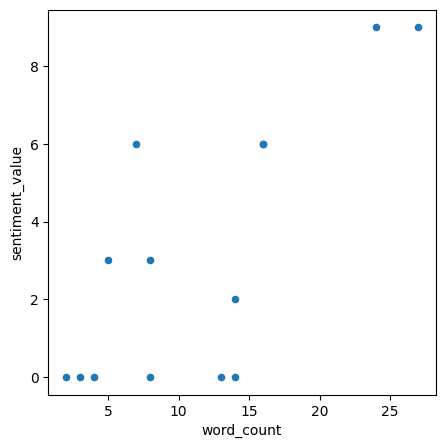

In [61]:
review_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(5,5))

In [62]:
review_df

,review_comments,sentiment_value,word_count
0,I started using this for my baby when she was ...,0,13
1,And I find it very useful for her eye concentr...,6,16
2,"My son just loved the library concept, loved t...",6,16
3,Good quality of print and pictures fascinated ...,9,27
4,To recognize diffrent things.,0,4
5,Particularly the book shapes out of 10 diffren...,2,14
6,Ang suggest for some of the pictorial represnt...,0,14
7,Good option to buy for the kids Useful for my ...,9,24
8,A complete collection of knowledge to our kids.,0,8
9,Very neat.,0,2
